In [363]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score,f1_score,mean_absolute_error
from sklearn.impute import SimpleImputer
import xgboost
from xgboost import XGBClassifier, plot_importance
import pickle as pk
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [364]:
diabetesdataurl='diabetes.csv'

diabetesdata= pd.read_csv(diabetesdataurl)

In [365]:
diabetesdata[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetesdata[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
# plt.figure(figsize=(10,10))
# sns.heatmap(diabetesdata.corr(), annot=True)
# plt.show()

In [393]:
diabetesdata.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [366]:
# diabetesdata['Glucose'].fillna(diabetesdata['Glucose'].mean(), inplace = True)
# diabetesdata['BloodPressure'].fillna(diabetesdata['BloodPressure'].mean(), inplace = True)
# diabetesdata['SkinThickness'].fillna(diabetesdata['SkinThickness'].median(), inplace = True)
# diabetesdata['Insulin'].fillna(diabetesdata['Insulin'].median(), inplace = True)
# diabetesdata['BMI'].fillna(diabetesdata['BMI'].median(), inplace = True)
diabetesdata.dropna(inplace=True)

In [367]:
X=diabetesdata.drop(['Outcome'],axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59
...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63


In [368]:
Y=diabetesdata['Outcome']
X=np.array(X)
X[0]

array([ 1.   , 89.   , 66.   , 23.   , 94.   , 28.1  ,  0.167, 21.   ])

In [369]:
scaler.fit_transform(np.array(X[0]).reshape(-1,1))

array([[-1.11717121],
       [ 1.38544132],
       [ 0.73134941],
       [-0.49151808],
       [ 1.52763521],
       [-0.34648031],
       [-1.14086071],
       [-0.54839563]])

In [370]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X[0])

[-0.7174265  -1.09104581 -0.37365481 -0.58510971 -0.52284201 -0.710421
 -1.03187632 -0.9682991 ]


In [371]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)


In [372]:
xgb_cls=xgboost.XGBClassifier(learning_rate =0.0001,
 n_estimators=1000,
 
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
# classifier=LogisticRegression()
# from sklearn import svm
# classifier=svm.SVC(kernel='linear')

classifier=xgb_cls.fit(X_train,Y_train)
pred=classifier.predict(X_train)


C:\Users\VICKFURY\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:50:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [373]:
    trainaccuracy=accuracy_score(Y_train,pred)
f1score= f1_score(Y_train,pred, average=None)
trainaccuracy, f1score

(0.9105431309904153, array([0.93333333, 0.86407767]))

In [374]:
preds=classifier.predict(X_test)
preds

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [375]:
Y_test

715    1
700    0
325    0
648    1
128    1
      ..
169    0
617    0
63     0
395    0
709    1
Name: Outcome, Length: 79, dtype: int64

In [376]:
testaccuracy=accuracy_score(Y_test,preds)
testaccuracy

0.8227848101265823

In [377]:
scaler = StandardScaler()
sample1=[1,89,66,23,94,28.1,0.167,21]
#sample1=[6,148,72,35,0,33.6,0.627,50]
sample1=np.array(sample1)
sample1=np.reshape(sample1,(-1,1))
sample1=scaler.fit_transform(sample1)
sample1=np.reshape(sample1,(1,-1))
print(sample1)
print(sample1.shape)
finalpred=classifier.predict(sample1)
print(finalpred)
if finalpred==1:
    print ('You have diabetes')
else:
    print ('No diabetes')

[[-1.11717121  1.38544132  0.73134941 -0.49151808  1.52763521 -0.34648031
  -1.14086071 -0.54839563]]
(1, 8)
[1]
You have diabetes


In [378]:
sample1
finalpred=classifier.predict(sample1)
print(finalpred)
if finalpred==1:
    print ('You have diabetes')
else:
    print ('No diabetes')

[1]
You have diabetes


In [379]:
# ml= "diabetespredmodelusingxgboost.pkl"
ml= "diabetespredmodelusingxgboost.json"
# md=pk.dump(classifier,open(ml,'wb'))
import joblib as jb
classifier.save_model(ml)
# jb.dump(classifier,ml)


In [380]:
# model =pk.load(open(ml,'rb'))
xgb_cls.load_model(ml)
# model=jb.load(ml)
sample1=[5,116,74,0,0,25.6,0.201,30]
# sample1=[6,148,72,35,0,33.6,0.627,50]
sample1=np.array(sample1)
sample1=sample1.reshape(1,-1)
print(sample1)
xgb_cls.predict(sample1)


[[  5.    116.     74.      0.      0.     25.6     0.201  30.   ]]


array([1])

In [384]:
classifier.feature_importances_

array([0.07563903, 0.32285193, 0.04576506, 0.07492194, 0.13513207,
       0.0886953 , 0.08970398, 0.16729072], dtype=float32)

In [381]:
xgboost.__version__

'1.5.0'

In [400]:
diabetesdata.columns.all

<bound method Index.all of Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')>

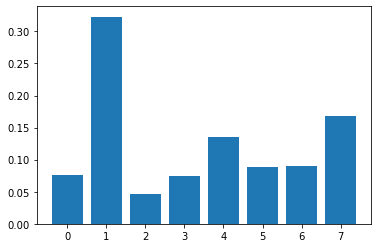

In [402]:
plt.bar(range(len(classifier.feature_importances_)), classifier.feature_importances_)
plt.show()

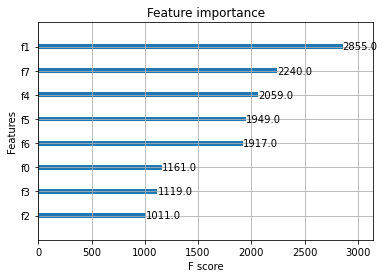

In [383]:
plot_importance(classifier)
plt.show()